# RUL Case study

In [1]:
import os
import numpy as np
import math
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import scipy.stats as s
import pandas as pd
import glob

In [2]:
import time
from datetime import datetime
os.chdir(r"F:\bk_casestudy\dataset_2")
files_1 = [f for f in glob.glob("**/*.39", recursive=True)]
timestamp=[]
for f in files_1:
    date_time=str(f)
#date_time
    datetime_str = date_time[:10].replace(".","-")+ " " + date_time[11:].replace(".",":")
    datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
    timestamp.append(int(time.mktime(datetime_object.timetuple())))

In [3]:
os.chdir(r"F:\bk_casestudy")

In [4]:
#f=open(r"F:\bk_casestudy\dataset_2\2004.02.12.10.32.39","r")
import glob

path = 'F:\\bk_casestudy\\dataset_2\\'

files = [f for f in glob.glob("**/*.39", recursive=True)]
ar_rms=[]
ar_kurtosis=[]
for f in files:
    #print(f)
    data=np.loadtxt(f)
    bearing_A=data[:,0]
    bearing_B=data[:,1]
    bearing_C=data[:,2]
    bearing_D=data[:,3]
    rms_bearing_A=np.sqrt(np.mean(bearing_A**2))
    rms_bearing_B=np.sqrt(np.mean(bearing_B**2))
    rms_bearing_C=np.sqrt(np.mean(bearing_C**2))
    rms_bearing_D=np.sqrt(np.mean(bearing_D**2))
    ar_rms.append([rms_bearing_A,rms_bearing_B,rms_bearing_C,rms_bearing_D])
    kurtosis_bearing_A=kurtosis(bearing_A)
    kurtosis_bearing_B=kurtosis(bearing_B)
    kurtosis_bearing_C=kurtosis(bearing_C)
    kurtosis_bearing_D=kurtosis(bearing_D)
    ar_kurtosis.append([kurtosis_bearing_A,kurtosis_bearing_B,kurtosis_bearing_C,kurtosis_bearing_D])
np.savetxt("rms_values.txt",ar_rms)
np.savetxt("kurtosis_values.txt",ar_kurtosis)
#np.savetxt("rms_values_B",rms_bearing_B)
#np.savetxt("rms_values_C",rms_bearing_C)
#np.savetxt("rms_values_D",rms_bearing_D)


# Graph for RMS 

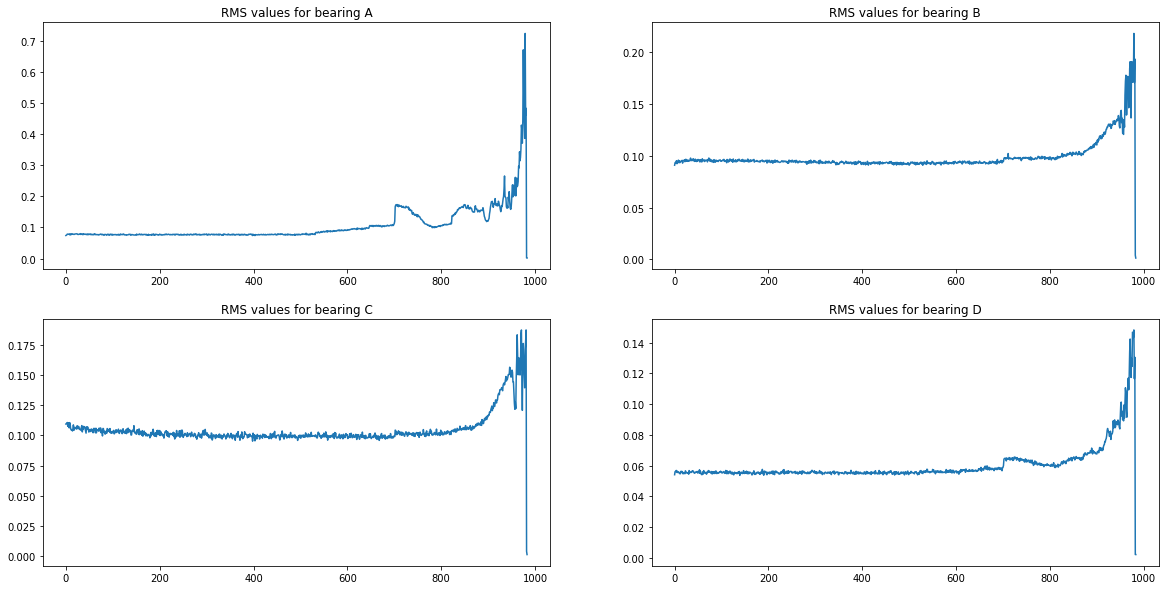

In [5]:

plot_data_A=[]
plot_data_B=[]
plot_data_C=[]
plot_data_D=[]
with open('rms_values.txt') as infile:
    for line in infile:
        plot_data_A.append(float(line.split()[0]))
        plot_data_B.append(float(line.split()[1]))
        plot_data_C.append(float(line.split()[2]))
        plot_data_D.append(float(line.split()[3]))
        #np.fromstring(plot_data)
        #plot_data.append()
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title("RMS values for bearing A")
plt.plot(plot_data_A)
plt.subplot(222)
plt.title("RMS values for bearing B")
plt.plot(plot_data_B)
plt.subplot(223)
plt.title("RMS values for bearing C")
plt.plot(plot_data_C)
plt.subplot(224)
plt.title("RMS values for bearing D")
plt.plot(plot_data_D)

# Graph for kurtosis

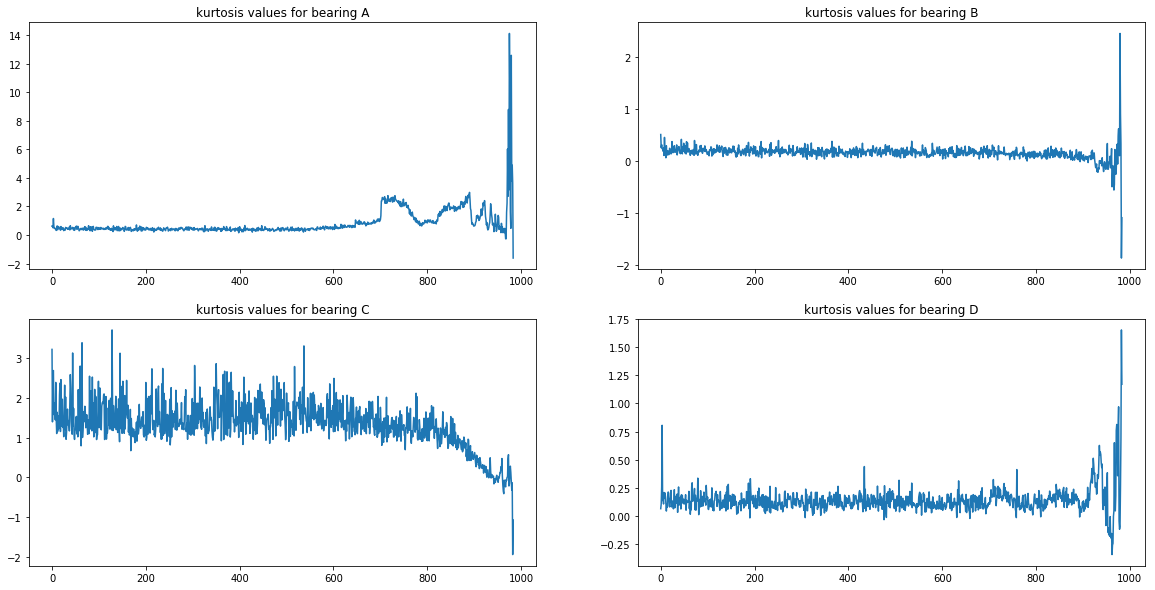

In [6]:

plot_data1_A=[]
plot_data1_B=[]
plot_data1_C=[]
plot_data1_D=[]
with open('kurtosis_values.txt') as infile:
    for line in infile:
        plot_data1_A.append(float(line.split()[0]))
        plot_data1_B.append(float(line.split()[1]))
        plot_data1_C.append(float(line.split()[2]))
        plot_data1_D.append(float(line.split()[3]))
        #np.fromstring(plot_data)
        #plot_data.append()
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title("kurtosis values for bearing A")
plt.plot(plot_data1_A)
plt.subplot(222)
plt.title("kurtosis values for bearing B")
plt.plot(plot_data1_B)
plt.subplot(223)
plt.title("kurtosis values for bearing C")
plt.plot(plot_data1_C)
plt.subplot(224)
plt.title("kurtosis values for bearing D")
plt.plot(plot_data1_D)

# weibull parameter estimation


In [7]:
print("RMS parameters",s.weibull_min.fit(plot_data_A, floc=0))
print("Kurtosis parametrs",s.weibull_min.fit(plot_data1_A, floc=0))

RMS parameters (1.9366638914705407, 0, 0.11978935984371036)
Kurtosis parametrs (1.2007715159872192, 0, 0.894702374127291)


In [8]:
param_RMS_A=s.exponweib.fit(plot_data_A, floc=0, f0=1)
param_RMS_B=s.exponweib.fit(plot_data_B, floc=0, f0=1)
param_RMS_C=s.exponweib.fit(plot_data_C, floc=0, f0=1)
param_RMS_D=s.exponweib.fit(plot_data_D, floc=0, f0=1)
param_kurtosis_A=s.exponweib.fit(plot_data1_A, floc=0, f0=1)
param_kurtosis_B=s.exponweib.fit(plot_data1_B, floc=0, f0=1)
param_kurtosis_C=s.exponweib.fit(plot_data1_C, floc=0, f0=1)
param_kurtosis_D=s.exponweib.fit(plot_data1_D, floc=0, f0=1)

In [9]:
#for bearing_A
shape_rms_A=param_RMS_A[1]
scale_rms_A=param_RMS_A[3]
shape_k_A=param_kurtosis_A[1]
scale_k_A=param_kurtosis_A[3]
#for bearing_B
shape_rms_B=param_RMS_B[1]
scale_rms_B=param_RMS_B[3]
shape_k_B=param_kurtosis_B[1]
scale_k_B=param_kurtosis_B[3]
#for bearing_C
shape_rms_C=param_RMS_C[1]
scale_rms_C=param_RMS_C[3]
shape_k_C=param_kurtosis_C[1]
scale_k_C=param_kurtosis_C[3]
#for bearing_D
shape_rms_D=param_RMS_D[1]
scale_rms_D=param_RMS_D[3]
shape_k_D=param_kurtosis_D[1]
scale_k_D=param_kurtosis_D[3]

In [10]:
print("RMS Shape parameter_A=",shape_rms_A,"," " RMS Scale parameter_A=", scale_rms_A)
print("Kurtosis Shape parameter_A=",shape_k_A,"," " Kurtosis Scale parameter_A=", scale_k_A)

RMS Shape parameter_A= 1.9366638914705407 , RMS Scale parameter_A= 0.11978935984371036
Kurtosis Shape parameter_A= 1.2007715159872192 , Kurtosis Scale parameter_A= 0.894702374127291


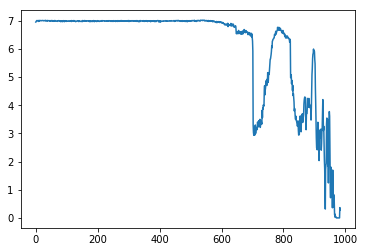

In [11]:
rms_pdf_A=s.weibull_min.pdf(plot_data_A, shape_rms_A, 0, scale_rms_A)
plt.plot(rms_pdf_A)
rms_pdf_B=s.weibull_min.pdf(plot_data_B, shape_rms_B, 0, scale_rms_B)
rms_pdf_C=s.weibull_min.pdf(plot_data_C, shape_rms_C, 0, scale_rms_C)
rms_pdf_D=s.weibull_min.pdf(plot_data_D, shape_rms_D, 0, scale_rms_D)

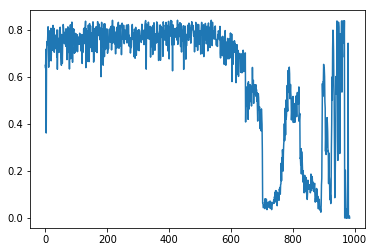

In [12]:
kurtosis_pdf_A=s.weibull_min.pdf(plot_data1_A, shape_k_A, 0, scale_k_A)
plt.plot(kurtosis_pdf_A)
kurtosis_pdf_B=s.weibull_min.pdf(plot_data1_B, shape_k_B, 0, scale_k_B)
kurtosis_pdf_C=s.weibull_min.pdf(plot_data1_C, shape_k_C, 0, scale_k_C)
kurtosis_pdf_D=s.weibull_min.pdf(plot_data1_D, shape_k_D, 0, scale_k_D)

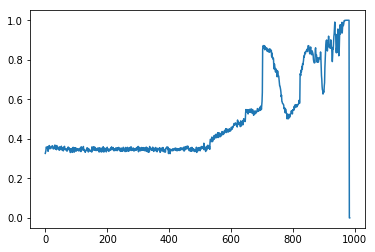

In [13]:
rms_cdf_A=s.weibull_min.cdf(plot_data_A, shape_rms_A, 0, scale_rms_A)
plt.plot(rms_cdf_A)
rms_cdf_B=s.weibull_min.cdf(plot_data_B, shape_rms_B, 0, scale_rms_B)
rms_cd_C=s.weibull_min.cdf(plot_data_C, shape_rms_C, 0, scale_rms_C)
rms_cdf_D=s.weibull_min.cdf(plot_data_D, shape_rms_D, 0, scale_rms_D)

In [30]:
#life_percentage
timestamp_norm = (timestamp)/np.mean(timestamp)
life_percentage_A = 1 - np.exp(- timestamp_norm/scale_rms_A)**shape_rms_A
life_percentage_time_A = (life_percentage_A-min(life_percentage_A))/(max(life_percentage_A)-min(life_percentage_A))
life_percentage_B = 1 - np.exp(- timestamp_norm/scale_k_B)**shape_k_B
life_percentage_time_B = (life_percentage_B-min(life_percentage_B))/(max(life_percentage_B)-min(life_percentage_B))
life_percentage_C = 1 - np.exp(- timestamp_norm/scale_k_C)**shape_k_C
life_percentage_time_C = (life_percentage_C-min(life_percentage_C))/(max(life_percentage_C)-min(life_percentage_C))
life_percentage_D = 1 - np.exp(- timestamp_norm/scale_k_D)**shape_k_D
life_percentage_time_D = (life_percentage_D-min(life_percentage_D))/(max(life_percentage_D)-min(life_percentage_D))
### min_max scaling 
#for bearing A
rms_fitted_fin_A = (rms_pdf_A-min(rms_pdf_A))/(max(rms_pdf_A)-min(rms_pdf_A))
kurtosis_fitted_fin_A = (kurtosis_pdf_A-min(kurtosis_pdf_A))/(max(kurtosis_pdf_A)-min(kurtosis_pdf_A))
kurtosis_rms_previous_A  = pd.DataFrame({"kurtosis_fitted_A" : kurtosis_fitted_fin_A , "rms_fitted_A": rms_fitted_fin_A,
              "date_time": timestamp_norm, "life_percentage_A":life_percentage_time_A})
kurtosis_rms_curr_A =  kurtosis_rms_previous_A[1:]
kurtosis_rms_previous_A.index = kurtosis_rms_previous_A.index + 1 #index-restting for joining on index
kurtosis_rms_previous_A.drop(['life_percentage_A'],axis=1, inplace=True)
print (kurtosis_rms_previous_A.columns)
kurtosis_rms_previous_A.columns = ['kurtosis_fitted_previous_A','rms_fitted_previous_A','date_time_previous']
###joing current and previous time, rms and kurtosis in the current df
final_df_A = kurtosis_rms_curr_A.join(kurtosis_rms_previous_A)
print (final_df_A.columns)
                                                                     
                    
#for bearing B
rms_fitted_fin_B = (rms_pdf_B-min(rms_pdf_B))/(max(rms_pdf_B)-min(rms_pdf_B))
kurtosis_fitted_fin_B = (kurtosis_pdf_B-min(kurtosis_pdf_B))/(max(kurtosis_pdf_B)-min(kurtosis_pdf_B))
kurtosis_rms_previous_B  = pd.DataFrame({"kurtosis_fitted_B" : kurtosis_fitted_fin_B , "rms_fitted_B": rms_fitted_fin_B,
              "date_time": timestamp_norm, "life_percentage_B":life_percentage_time_B})
kurtosis_rms_curr_B =  kurtosis_rms_previous_B[1:]
kurtosis_rms_previous_B.index = kurtosis_rms_previous_B.index + 1 #index-restting for joining on index
kurtosis_rms_previous_B.drop(['life_percentage_B'],axis=1, inplace=True)
#print (kurtosis_rms_previous_B.columns)
kurtosis_rms_previous_B.columns = ['kurtosis_fitted_previous_B','rms_fitted_previous_B','date_time_previous']
###joing current and previous time, rms and kurtosis in the current df
final_df_B = kurtosis_rms_curr_B.join(kurtosis_rms_previous_B)
#print (final_df_B.columns)
                    
#for bearing C
rms_fitted_fin_C = (rms_pdf_C-min(rms_pdf_C))/(max(rms_pdf_C)-min(rms_pdf_C))
kurtosis_fitted_fin_C = (kurtosis_pdf_C-min(kurtosis_pdf_C))/(max(kurtosis_pdf_C)-min(kurtosis_pdf_C))
kurtosis_rms_previous_C  = pd.DataFrame({"kurtosis_fitted_C" : kurtosis_fitted_fin_C , "rms_fitted_C": rms_fitted_fin_C,
              "date_time": timestamp_norm, "life_percentage_C":life_percentage_time_C})
kurtosis_rms_curr_C =  kurtosis_rms_previous_C[1:]
kurtosis_rms_previous_C.index = kurtosis_rms_previous_C.index + 1 #index-restting for joining on index
kurtosis_rms_previous_C.drop(['life_percentage_C'],axis=1, inplace=True)
#print (kurtosis_rms_previous_C.columns)
kurtosis_rms_previous_C.columns = ['kurtosis_fitted_previous_C','rms_fitted_previous_C','date_time_previous']
###joing current and previous time, rms and kurtosis in the current df
final_df_C = kurtosis_rms_curr_C.join(kurtosis_rms_previous_C)
#print (final_df_C.columns)
                      
#for bearing D
rms_fitted_fin_D = (rms_pdf_D-min(rms_pdf_D))/(max(rms_pdf_D)-min(rms_pdf_D))
kurtosis_fitted_fin_D = (kurtosis_pdf_D-min(kurtosis_pdf_D))/(max(kurtosis_pdf_D)-min(kurtosis_pdf_D))
kurtosis_rms_previous_D  = pd.DataFrame({"kurtosis_fitted_D" : kurtosis_fitted_fin_D , "rms_fitted_D": rms_fitted_fin_D,
              "date_time": timestamp_norm, "life_percentage_D":life_percentage_time_D})
kurtosis_rms_curr_D =  kurtosis_rms_previous_D[1:]
kurtosis_rms_previous_D.index = kurtosis_rms_previous_D.index + 1 #index-restting for joining on index
kurtosis_rms_previous_D.drop(['life_percentage_D'],axis=1, inplace=True)
#print (kurtosis_rms_previous_D.columns)
kurtosis_rms_previous_D.columns = ['kurtosis_fitted_previous_D','rms_fitted_previous_D','date_time_previous']
###joing current and previous time, rms and kurtosis in the current df
final_df_D = kurtosis_rms_curr_D.join(kurtosis_rms_previous_D)
#print (final_df_D.columns)
                      

Index(['kurtosis_fitted_A', 'rms_fitted_A', 'date_time'], dtype='object')
Index(['kurtosis_fitted_A', 'rms_fitted_A', 'date_time', 'life_percentage_A',
       'kurtosis_fitted_previous_A', 'rms_fitted_previous_A',
       'date_time_previous'],
      dtype='object')


# Result of training and validation set

Maximum number of iterations reached
Validation Error 1.740535718456029e-06
Training Error 2.930278192735083e-06
Complete Dataset Error 2.968600511949462e-06


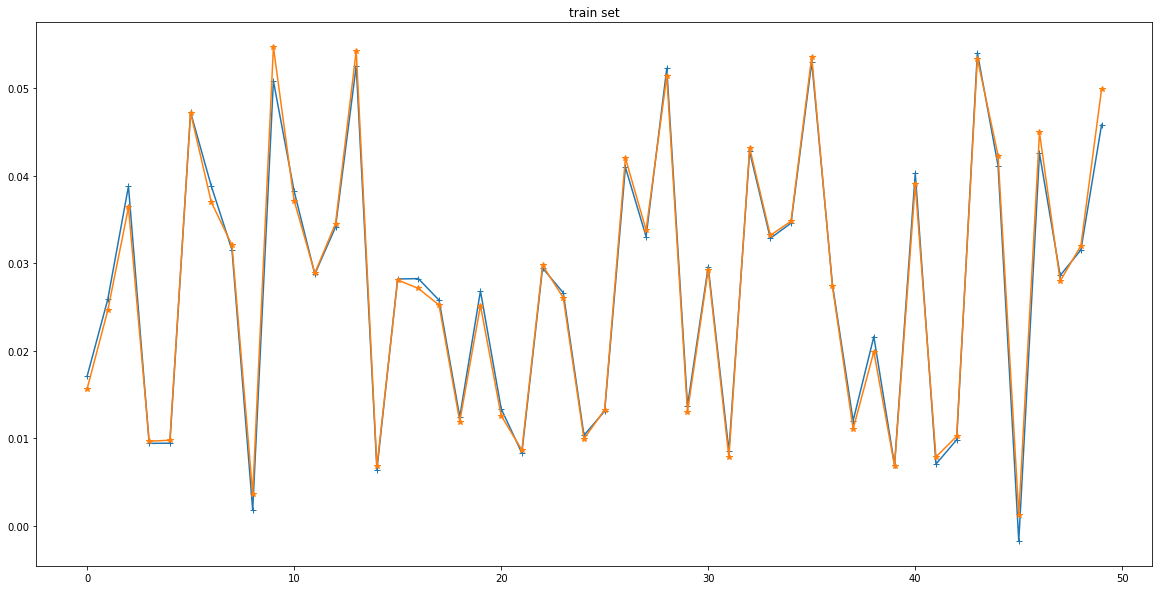

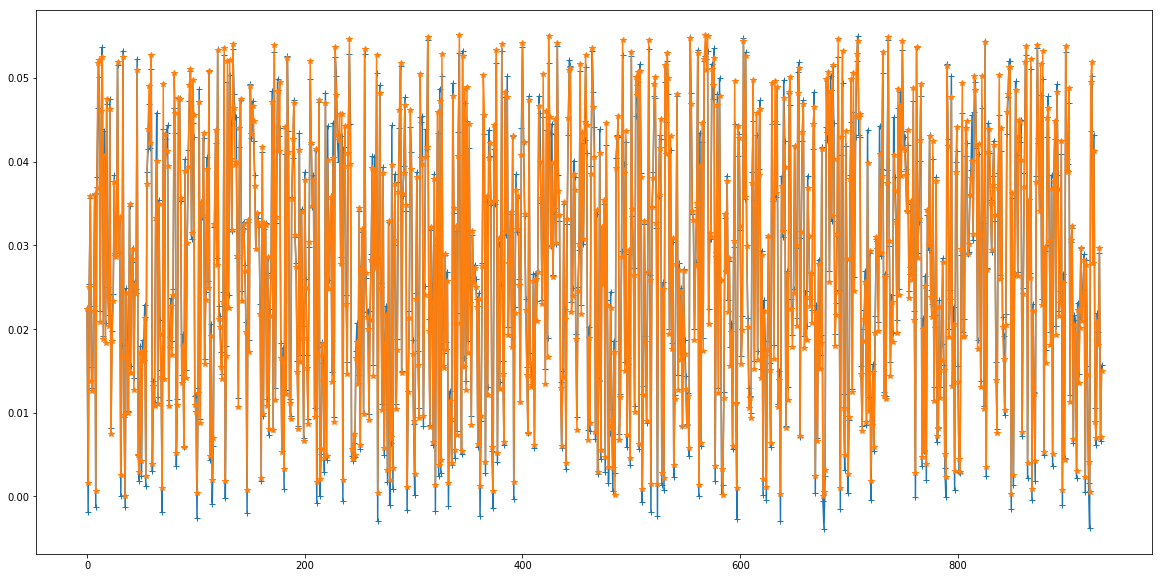

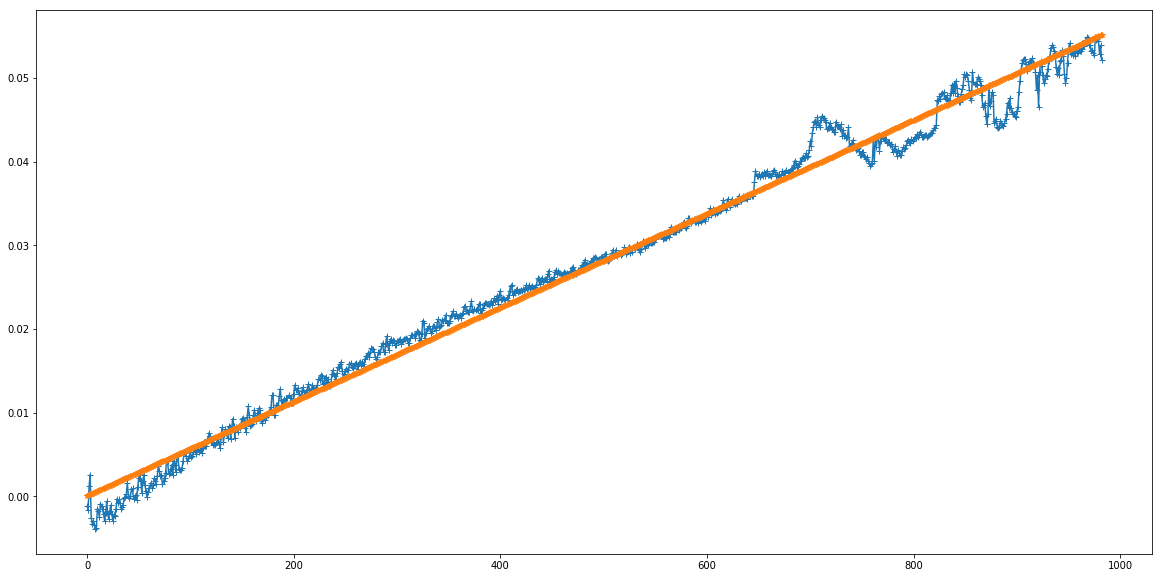

In [16]:
import pyrenn as prn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split

final_df_A.fillna(method="ffill", inplace=True)
#kurtosis_fitted = kurtosis_fitted.replace([np.inf, -np.inf], np.nan)

y = final_df_A.life_percentage_A

#normalized life_percenatge
y = preprocessing.normalize([y], norm='l2')
X = final_df_A.drop(["life_percentage_A"], axis=1)


X_train, X_cv, y_train, y_cv = train_test_split(X, y[0], test_size=0.05, random_state=10)
X_train=np.array(X_train.transpose())
X_cv=np.array(X_cv.transpose())
y_train=np.array(y_train.transpose())
y_cv=np.array(y_cv.transpose())
X=np.array(X.transpose())
y=np.array(y.transpose())
net=prn.CreateNN([6,2,1],dIn=[0,1],dIntern=[],dOut=[1])
#for i in len(X_train):
prn.train_LM(X_train,y_train,net,k_max=100,E_stop=1e-3,verbose=False)

##cross validation set
#nn.fit(X_train, y_train)
#pred  = nn.predict(X_cv)
y_pred=prn.NNOut(X_cv,net)
print ("Validation Error", mean_squared_error(y_pred, y_cv))
plt.figure(figsize=(20,10))
plt.plot(y_pred,marker="+",)
plt.plot(y_cv, marker="*")

##train set
y_pred1  = prn.NNOut(X_train,net)
print ("Training Error", mean_squared_error(y_pred1, y_train))
plt.title("train set")
plt.figure(figsize=(20,10))
plt.plot(y_pred1, marker="+")
plt.plot(y_train, marker="*")

##Complete Data
y_pred_fulldata  = prn.NNOut(X,net)
print ("Complete Dataset Error", mean_squared_error(y_pred_fulldata, y))

plt.figure(figsize=(20,10))
plt.plot(y_pred_fulldata, marker="+")
plt.plot(y, marker="*")



# Output performance on test set

2.859429704885221e-06


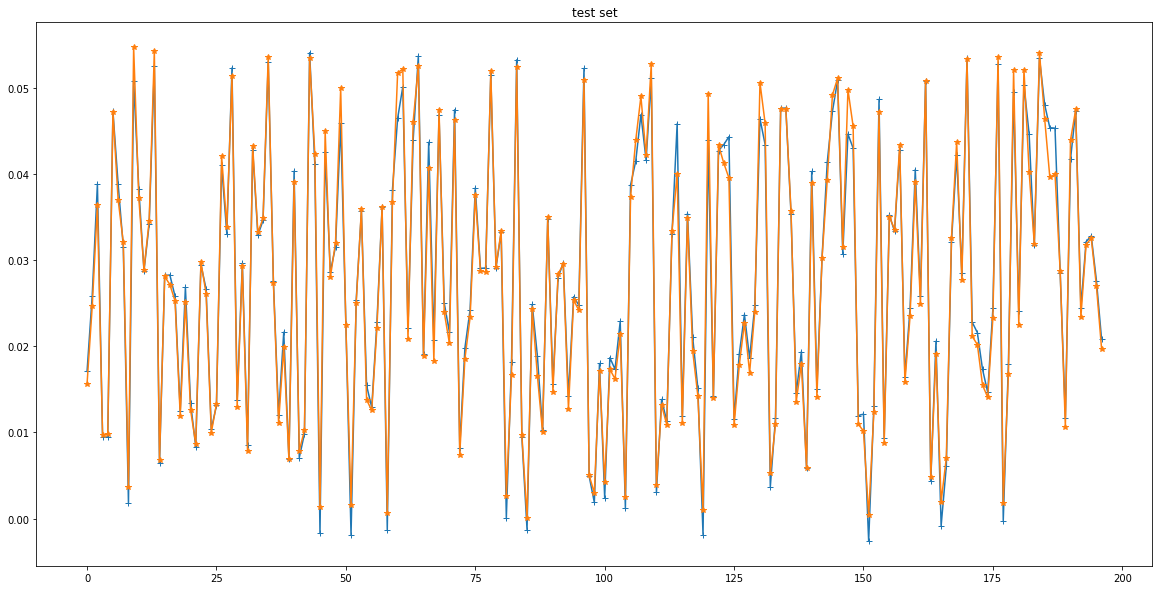

In [17]:

y_t = final_df_A.life_percentage_A

#normalized life_percenatge_A
y_t = preprocessing.normalize([y_t], norm='l2')
X_t = final_df_A.drop(["life_percentage_A"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t[0], test_size=0.2, random_state=10)
X_test=np.array(X_test.transpose())
y_test=np.array(y_test.transpose())
y_t_pred  = prn.NNOut(X_test,net)
print (mean_squared_error(y_t_pred, y_test))
plt.figure(figsize=(20,10))
plt.title("test set")
plt.plot(y_t_pred, marker="+")
plt.plot(y_test, marker="*")

In [22]:
#to predict RUL of rotating equipment as whole: combine data for all bearing into one df and train the model.
from functools import reduce
dfs=[final_df_A, final_df_B, final_df_C, final_df_D]
df_final=reduce(lambda left, right: pd.merge(left, right, on=('date_time','date_time_previous')), dfs)

In [31]:
final_df_B=final_df_B.drop(['date_time','date_time_previous'],axis=1)
final_df_C=final_df_C.drop(['date_time','date_time_previous'],axis=1)
final_df_D=final_df_D.drop(['date_time','date_time_previous'],axis=1)
f_dfs=pd.concat([final_df_A, final_df_B, final_df_C, final_df_D],axis=1)
f_dfs.columns

Index(['kurtosis_fitted_A', 'rms_fitted_A', 'date_time', 'life_percentage_A',
       'kurtosis_fitted_previous_A', 'rms_fitted_previous_A',
       'date_time_previous', 'kurtosis_fitted_B', 'rms_fitted_B',
       'life_percentage_B', 'kurtosis_fitted_previous_B',
       'rms_fitted_previous_B', 'kurtosis_fitted_C', 'rms_fitted_C',
       'life_percentage_C', 'kurtosis_fitted_previous_C',
       'rms_fitted_previous_C', 'kurtosis_fitted_D', 'rms_fitted_D',
       'life_percentage_D', 'kurtosis_fitted_previous_D',
       'rms_fitted_previous_D'],
      dtype='object')

Termination Error reached
Validation Error 0.00028366088380651856


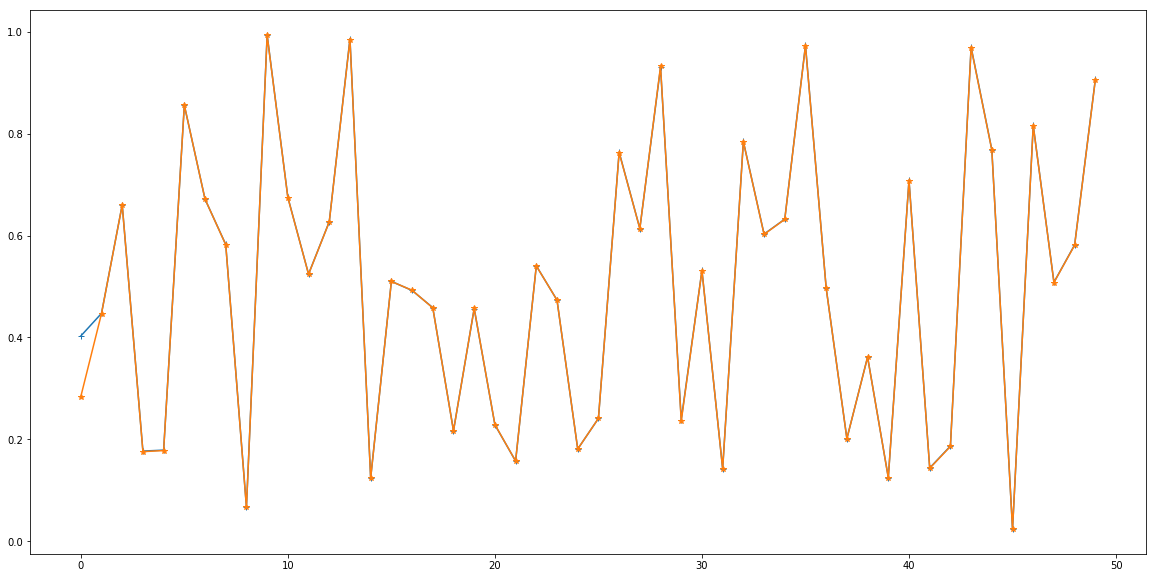

In [47]:
#f
y_f = pd.DataFrame({"life_percentage_A" : f_dfs.life_percentage_A, "life_percentage_B" : f_dfs.life_percentage_B,
                    "life_percentage_C" : f_dfs.life_percentage_C, "life_percentage_D" : f_dfs.life_percentage_D})

#normalized life_percenatge
#y_f = preprocessing.normalize([y_f], norm='l2')
X_f = f_dfs.drop(["life_percentage_A", "life_percentage_B", "life_percentage_C", "life_percentage_D"], axis=1)


X_f_train, X_f_cv, y_f_train, y_f_cv = train_test_split(X_f, y_f.iloc[:,0], test_size=0.05, random_state=10)
X_f_train=np.array(X_f_train.transpose())
X_f_cv=np.array(X_f_cv.transpose())
y_f_train=np.array(y_f_train.transpose())
y_f_cv=np.array(y_f_cv.transpose())
X_f=np.array(X_f.transpose())
y_f=np.array(y_f.transpose())
net_f=prn.CreateNN([18,2,1],dIn=[0,1],dIntern=[],dOut=[1])
#for i in len(X_train):
prn.train_LM(X_f_train,y_f_train,net_f,k_max=100,E_stop=1e-3,verbose=False)

##cross validation set
#nn.fit(X_train, y_train)
#pred  = nn.predict(X_cv)
y_f_pred=prn.NNOut(X_f_cv,net_f)
print ("Validation Error", mean_squared_error(y_f_pred, y_f_cv))
plt.figure(figsize=(20,10))
plt.plot(y_f_pred,marker="+",)
plt.plot(y_f_cv, marker="*")
